#Dimensionality Reduction
---

- Ahda Rindang Al-Amin
- 2311531003
---

##Praktikum

### Load dan Eksplorasi Data

Kode ini memuat dataset Iris menggunakan pustaka `scikit-learn`, dan mencetak jumlah data serta jumlah fitur.

1. **Import Dataset**  
   Mengimpor fungsi `load_iris` dari modul `sklearn.datasets`.

2. **Load Data**  
   Dataset dimuat ke variabel `iris`, yang merupakan objek seperti dictionary.

3. **Ekstrak Data dan Label**
   - `X` berisi fitur (panjang dan lebar sepal & petal).
   - `y` berisi label target (0, 1, atau 2).

4. **Hitung Ukuran Data**
   - `n_samples`: jumlah baris (data/sampel).
   - `n_features`: jumlah kolom (fitur).

5. **Cetak Jumlah Sampel dan Fitur**
   Menampilkan jumlah data dan jumlah fitur menggunakan `print()`.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print(f'Number of samples:', n_samples)
print(f'Number of features:', n_features)

Number of samples: 150
Number of features: 4


Untuk memperoleh gambaran tentang bagaimana fitur (variabel independen) saling berhubungan, visualisasikan melalui histogram dan scatter plots.

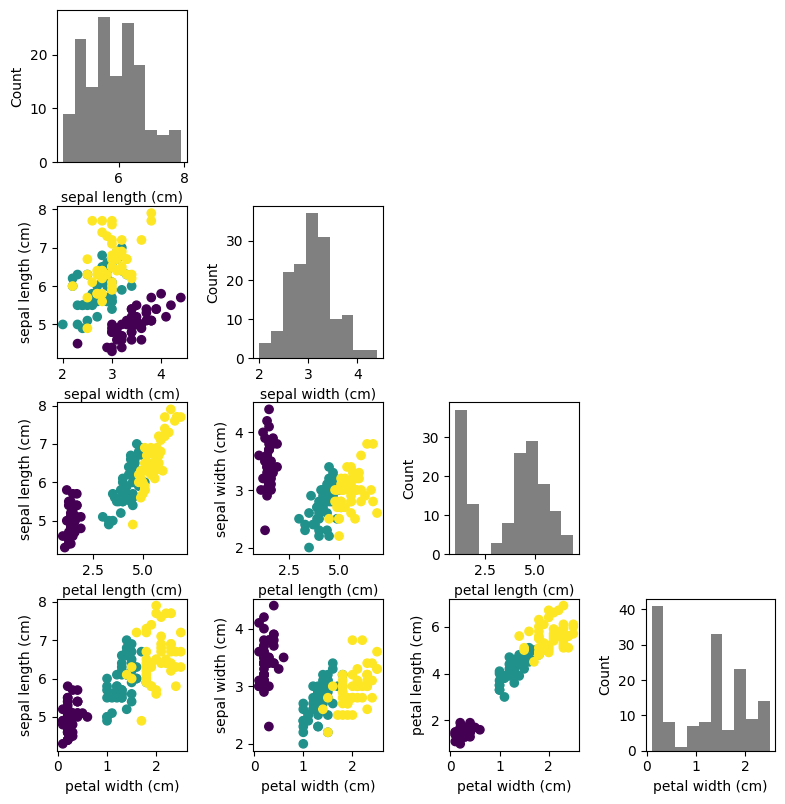

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip (*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, j], X[:, i], c = y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
    ax[i, i].hist(X[:, i], color='grey')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])

### Standarisasi Data

Langkah ini memastikan algoritma dapat memproses kumpulan data secara efisien. jika data tidak distandarkan, nilai yang kebih besar mngkin memiliki dominasi lebih besar pada algoritma. Semua data harus memiliki bobot yang sama, itulah sebabnya mengapa standarisasi data penting.

Caranya -- Hitung Z-score (nilai standar) untuk setiap nilai dalam kumpulan data dengan cara mengurangi rata-rata fitur atau kolom dari setiap nilai x dalam kolom dan membaginya dengna deviasi standar.

In [3]:
def mean(x): #np.mean(X, axis = 0)
  return sum(x)/len(x)

def std(x): #np.std(X, axis = 0)
  return (sum((i-mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
  return (X-mean(X))/std(X)

X_std = Standardize_data(X)

Berikut adalah perbedaan data sebelum dan sesudah distandarisasi

In [4]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Hitung Covariance Matrix

Fungsi ini menghitung matriks kovarian dari dataset yang telah distandardisasi.

**Rumus:**
$$
\text{Cov}(X) = \frac{X^T \cdot X}{n - 1}
$$

**Penjelasan:**
- `X.T`: Transpose dari X.
- `@`: Operator perkalian matriks (`dot product`).
- `n - 1`: Pembagi kovarian berdasarkan jumlah sampel (`n = jumlah baris`).

**Output:**
Matriks kovarian `cov_mat` akan berukuran `(n_features x n_features)`, di mana:
- Diagonal = variansi tiap fitur (≈1 jika distandardisasi).
- Off-diagonal = kekuatan hubungan linear antar fitur.

In [5]:
def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std)
print(cov_mat)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### Hitung eigenvalue dan eigenvector dari covariance matrix

igenvalue dan eigenvector adalah konsep penting dalam aljabar linear yang banyak digunakan dalam analisis data, khususnya dalam PCA (Principal Component Analysis).

Secara sederhana, eigenvector adalah arah tetap dalam ruang data yang tidak berubah arah meskipun terkena transformasi linear, sementara eigenvalue adalah skala perubahan panjang vektor tersebut setelah transformasi. Dalam konteks PCA, eigenvectors mewakili arah komponen utama (principal components), dan eigenvalues menunjukkan seberapa besar variansi data yang dijelaskan oleh masing-masing arah tersebut.

Kode berikut melakukan eigen decomposition terhadap matriks kovarian dari dataset yang telah distandardisasi. Fungsi eig() dari NumPy menghasilkan dua hal: daftar eigenvalue dan matriks eigenvector. Eigenvalue ini menunjukkan seberapa besar informasi (variansi) yang ditangkap oleh masing-masing eigenvector. Untuk menjaga konsistensi arah, dilakukan penyesuaian agar elemen dominan (nilai absolut terbesar) dari setiap eigenvector bernilai positif. Setelah itu, eigenvectors ditranspos agar tiap baris mewakili satu komponen utama. Hasil akhirnya adalah sekumpulan eigenvalue dan eigenvector yang siap digunakan untuk mereduksi dimensi data atau memvisualisasikan struktur utama dalam dataset.

In [6]:
from numpy.linalg import eig

#eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

#adjusting the eigenvectors (laodings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


### Urutkan eigenvector dan eigenvalue

Urutkan komponen utama berdasarkan besar kontribusinya terhadap variansi data, yaitu berdasarkan nilai eigenvalue-nya. Sebelumnya, setelah dilakukan eigen decomposition terhadap matriks kovarian, kita memperoleh sejumlah pasangan eigenvalue dan eigenvector. Namun, urutannya belum tentu dari yang paling penting (terbesar kontribusinya) ke yang paling kecil.

Pertama, dibuat sebuah list berisi pasangan (eigenvalue, eigenvector) dalam bentuk tuple. Nilai absolut dari eigenvalue digunakan untuk menghindari potensi nilai negatif akibat ketidaksempurnaan numerik, meskipun secara teoritis nilai eigenvalue untuk matriks kovarian (yang positif semi-definit) tidak akan negatif.

Lalu, list tersebut diurutkan menurun berdasarkan besar eigenvalue. Dengan ini, eigenvector yang menjelaskan variansi terbesar akan berada di posisi pertama. Ini penting karena dalam PCA, kita sering hanya menggunakan beberapa komponen utama teratas untuk mereduksi dimensi data.

Setelah diurutkan, eigenvalue dan eigenvector disusun kembali dalam dua array terpisah (eig_vals_sorted dan eig_vecs_sorted) agar mudah digunakan dalam langkah-langkah PCA selanjutnya.

In [7]:
#we first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

#then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#for further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print (eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


### Pilih principal component (PC)

Setelah semua eigenvector diurutkan berdasarkan eigenvalue-nya, kita memilih k komponen utama teratas — yaitu eigenvector yang paling banyak menjelaskan variansi dalam data. Di sini, nilai k = 2, artinya kita ingin mereduksi data ke dalam dua dimensi utama.

Baris W = eig_vecs_sorted[:k, :] mengambil 2 eigenvector teratas dari daftar yang sudah diurutkan sebelumnya dan menyusunnya menjadi sebuah matriks W. Setiap baris pada W mewakili satu eigenvector (atau komponen utama), dan setiap kolomnya mewakili kontribusi fitur asli terhadap komponen tersebut.

In [14]:
#select top k eigenvector
k = 2
W = eig_vecs_sorted[:k, :]

print(W.shape)

(2, 4)


Pemilihan k = 2 didasarkan pada nilai cumulative explained variance. Dari output, dua komponen utama pertama menjelaskan sekitar 95.81% dari total variansi data. Ini berarti hampir seluruh informasi penting dalam dataset sudah tercakup hanya dengan dua dimensi, sehingga cukup efisien untuk mereduksi dimensi dari 4 ke 2 tanpa kehilangan informasi yang signifikan.

Explained Variance: [72.96 22.85  3.67  0.52]
Cumulative Explained Variance: [ 72.96  95.81  99.48 100.  ]


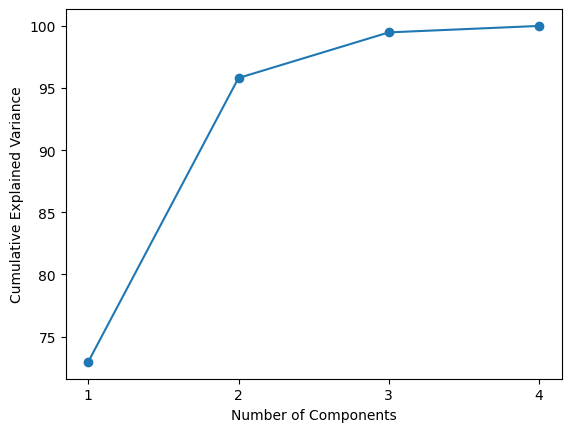

In [15]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total) * 100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print("Explained Variance: {}".format(explained_variance))
print("Cumulative Explained Variance: {}".format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Proyeksikan data yang telah di standarisasi

In [10]:
X_proj = X_std.dot(W.T)

print(X_proj.shape) #Dimensi data hasil transformasi
print(X.shape)      #Dimensi data awal

(150, 2)
(150, 4)


## Tugas

PCA with Scikit_Learn

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan PCA dan ambil 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tampilkan hasil transformasi
print("Shape setelah PCA:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape setelah PCA: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]
